<a href="https://colab.research.google.com/github/Avichay3/Full-training/blob/main/Brain_tumor_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Mission Overview

A **Data science mission** involves building a system that learns from data to make predictions or discover patterns. The process begins by defining the problem, gathering and preparing the necessary data, choosing and training models, and finally deploying the model for real-world use. Each step ensures the model is optimized for accuracy, efficiency, and adaptability.

### Key Steps in an Data science Mission:
- **Define the problem**: Identify the goal (classification, regression, clustering, etc.).
- **Collect data**: Gather relevant data for the task.
- **Data preprocessing**: Clean, normalize, and prepare the data.
- **Exploratory Data Analysis (EDA)**: Explore patterns and relationships in the data.
- **Feature engineering**: Create or modify features to improve model performance.
- **Model selection**: Choose appropriate algorithms for the problem.
- **Model training**: Train the model using the training data.
- **Validation**: Validate model performance and tune hyperparameters.
- **Evaluation**: Test the model using appropriate metrics.
- **Deployment**: Deploy the model for real-world usage.

In this assignment we will get a good grip on the entire process of a Data science task. Here, you will experience the world of ML and DL.

Mission goal:
  * provide a full ML solution and analysis of *Bank Marketing Dataset*. https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
  * provide a full DL solution and analysis of *MNIST Dataset*.
  https://www.kaggle.com/datasets/hojjatk/mnist-dataset

For each mission, be sure to fill the following cells. If you think anything is missing, please contact your instructor.

0. **Problem understanding**  
   - Understand what is the task that you are requested to solve. what is the buisness problem?
   - Be sure to understand your data. what are the features? what is the target?

Write the answer

1. **Data Loading**  
   - Load the provided dataset using appropriate libraries (e.g., `pandas`, `numpy`).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
# download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")


Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.


In [2]:


import os

print(path)
print(os.listdir(path))


/kaggle/input/brain-tumor-classification-mri
['Training', 'Testing']


In [3]:
import os

train_dir = os.path.join(path, "Training")
test_dir  = os.path.join(path, "Testing")

print("Train classes:", sorted(os.listdir(train_dir)))
print("Test classes:", sorted(os.listdir(test_dir)))


Train classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Test classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [4]:
import os

# check where is the files, if it is on my pc
print("running on kaggle:", os.path.exists("/kaggle"))



running on kaggle: True


I see that I run on the server of kaggle and not on my pc

In [5]:
# check what is the size of the images
from PIL import Image
import os

sample_class = os.listdir(train_dir)[0]
sample_img = os.listdir(os.path.join(train_dir, sample_class))[0]

img = Image.open(os.path.join(train_dir, sample_class, sample_img))
print(img.size)


(236, 236)


# Now I want to see some images and see the resolution and the input size images

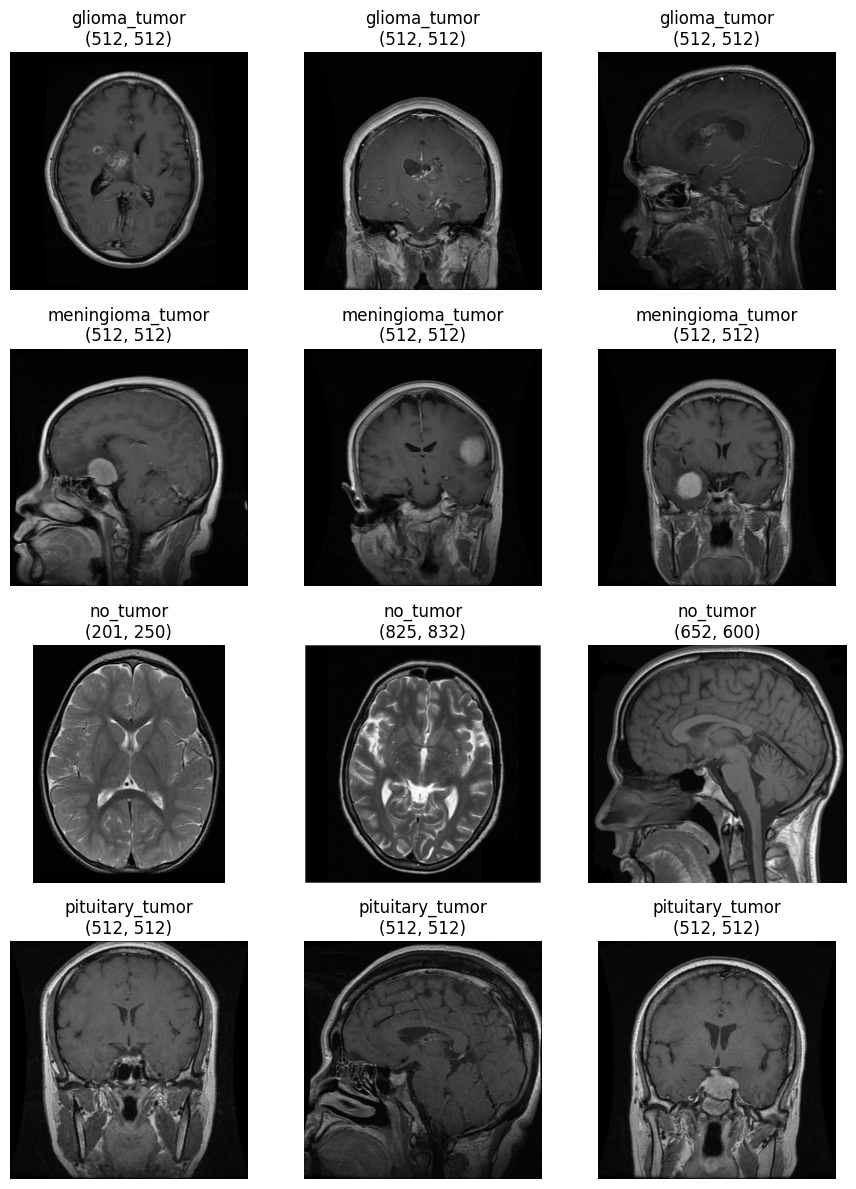

In [6]:
import random

class_names = sorted(os.listdir(train_dir))

SAMPLES_PER_CLASS = 3
random.seed(42)

plt.figure(figsize=(SAMPLES_PER_CLASS * 3, len(class_names) * 3))

plot_idx = 1


for cls in class_names:
    cls_dir = os.path.join(train_dir, cls)
    images = os.listdir(cls_dir)
    samples = random.sample(images, SAMPLES_PER_CLASS)

    for img_name in samples:
        img_path = os.path.join(cls_dir, img_name)
        img = Image.open(img_path)

        plt.subplot(len(class_names), SAMPLES_PER_CLASS, plot_idx)
        plt.imshow(img)
        plt.title(f"{cls}\n{img.size}")
        plt.axis("off")

        plot_idx += 1

plt.tight_layout()
plt.show()




lets change the images shape to be constant


In [7]:
import tensorflow as tf
import os

#
TRAIN_DIR = os.path.join(path, "Training")

IMG_SIZE = (224, 224)
BATCH = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=True,
    seed=SEED
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 2870 files belonging to 4 classes.
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


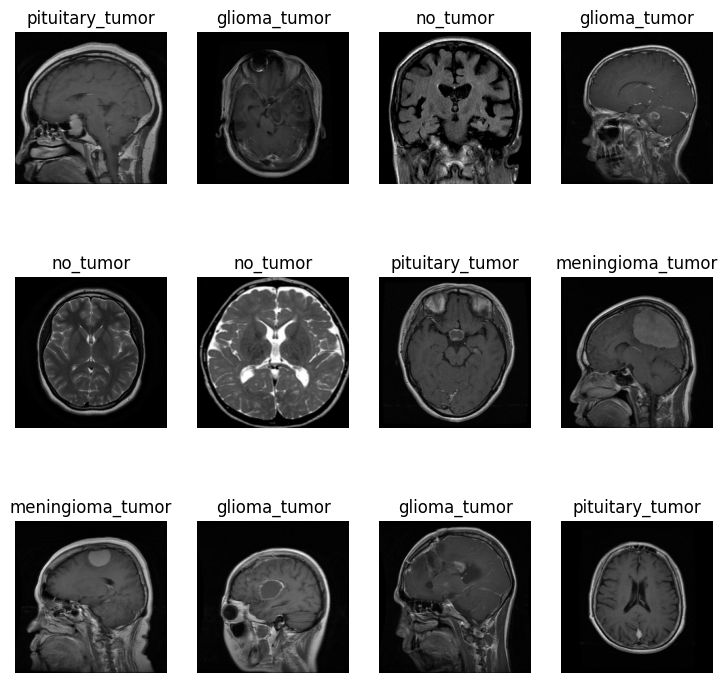

In [8]:
# plot some images to see the data
plt.figure(figsize=(9, 9))

for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

plt.show()


**Images were resized to 224×224 pixels without cropping, preserving the entire field of view**

2. **Exploratory Data Analysis (EDA)**  
   Perform an initial exploration of the data:
   - **Anomalies:** Identify any outliers or anomalies.
   - **Missing Values:** Check for missing values.
   - **Data Types:** Verify the types of your data (numerical, categorical, etc.).
   - **Class Imbalance (if applicable):** Check for imbalanced classes and address it if necessary (e.g., resampling techniques, class weighting).

   Awnser these questions and more to understand better the data:
   - What is the most common age group that survived?
   - Which pclass was more likely to survive?
   - How many children under the age of 18 died?
   - Ask your self some more questions, and show the answers using charts.

In [9]:
from PIL import Image

corrupted = 0
total = 0

for cls in os.listdir(train_dir):
    cls_dir = os.path.join(train_dir, cls)
    for img_name in os.listdir(cls_dir):
        total += 1
        try:
            img = Image.open(os.path.join(cls_dir, img_name))
            img.verify()
        except:
            corrupted += 1

print("total images:", total)
print("corrupted images:", corrupted)


total images: 2870
corrupted images: 0


now lets check class imbalance :

In [10]:
class_counts = {
    cls: len(os.listdir(os.path.join(train_dir, cls)))
    for cls in os.listdir(train_dir)
}

class_counts


{'no_tumor': 395,
 'pituitary_tumor': 827,
 'meningioma_tumor': 822,
 'glioma_tumor': 826}

we can see that there is some imbalance, because "no tumor" has 395 images while other classes has 822-827.
lets try to give class weight so that "no tumor" pay more for mistakes.
because there is approximatly two times from the other classes, every mistake will pay approximately two times more then the other classes.

**First I thaught to make an augmentation to the class with the imbalance, but it can make a problem with this data (medicine data). For example, we can't change the color of the images, resolution and so on..'
**

In [11]:
counts_in_order = np.array([class_counts[c] for c in class_names])
total = counts_in_order.sum()
num_classes = len(class_names)

class_weight = {
    i: total / (num_classes * counts_in_order[i])
    for i in range(num_classes)
}


for i, cls in enumerate(class_names):
    print(f"{cls}: count={counts_in_order[i]}, weight={class_weight[i]:.2f}")


glioma_tumor: count=826, weight=0.87
meningioma_tumor: count=822, weight=0.87
no_tumor: count=395, weight=1.82
pituitary_tumor: count=827, weight=0.87


**Now lets check anomalies in the data:**


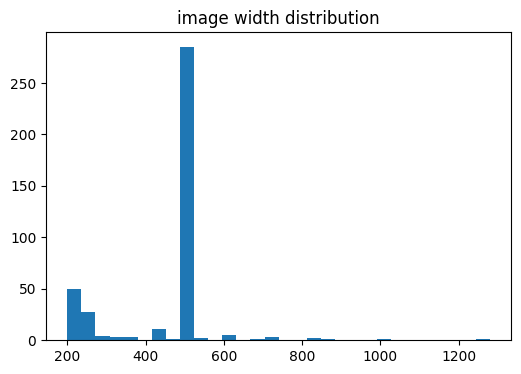

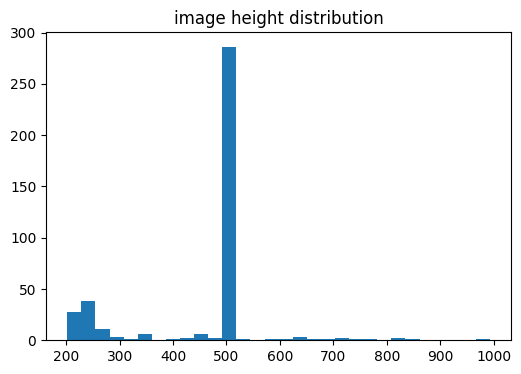

In [12]:
widths = []
heights = []

for cls in os.listdir(train_dir):
    cls_dir = os.path.join(train_dir, cls)
    for img_name in os.listdir(cls_dir)[:100]:
        img = Image.open(os.path.join(cls_dir, img_name))
        w, h = img.size
        widths.append(w)
        heights.append(h)

plt.figure(figsize=(6,4))
plt.hist(widths, bins=30)
plt.title("image width distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(heights, bins=30)
plt.title("image height distribution")
plt.show()



3. **Data Cleaning**  
   - Handle missing values using appropriate techniques (imputation, deletion, etc.). Explain.
   - Deal with anomalies if necessary (e.g., transformation, capping, or removing outliers). Explain.

**data cleaning for the image dataset focused on file integrity and structural consistency. all the image files were verified and no missing or corrupted samples were found, eliminating the need for imputation or deletion. variability in
image resolution and appearance was identified as a form of structural anomaly rather than noise. these differences were addressed through resizing all images to a fixed resolution and applying standard normalization, ensuring consistency while preserving real-world variability.**

4. **Feature Engineering**  
   - Create new features or transform existing ones. Explain.
   - Handle categorical variables (e.g., one-hot encoding, label encoding). Explain.
   - Scale/normalize numerical data if necessary. Explain.
   - Remove redundant, irrelevant, or highly correlated features. Explain.
   - Use feature selection methods if applicable (e.g., recursive feature elimination, importance-based selection). Explain.

**feature engineering was primarily conducted implicitly through convolutional neural networks, which automatically learn hierarchical representations from raw image data. prior to training, images were resized to a fixed resolution to ensure consistent spatial representation, and pixel intensities were normalized using the preprocessing scheme of the pretrained network. the categorical target variable was encoded using integer labels. No manual feature selection or removal was performed, as the model learns task-relevant features end-to-end, while transfer learning served as an implicit feature selection mechanism by leveraging pretrained convolutional layers.**

5. **Data Splitting**  
   - Split the dataset into training, validation, and test sets: Explain how to split.
     - **Training set:** For model training.
     - **Validation set:** For hyperparameter tuning and validation.
     - **Test set:** For final model evaluation.
   - Consider using **cross-validation** for better validation if the dataset is small.

**the dataset was split into training, and test sets to ensure reliable evaluation. A predefined test set provided with the dataset was reserved exclusively for final performance assessment. the remaining data were used for training, with a validation subset extracted to support model selection and hyperparameter tuning. this approach prevents data leakage and enables unbiased evaluation. cross validation was not employed due to the computational cost of training deep convolutional networks and the sufficient size of the dataset.**

6. **Model Selection**  
   Train at least **3 different models** of your choice (e.g., Decision Trees, Random Forest, Logistic Regression, SVM, etc.):
   - Justify your model choices.
   - Evaluate your models using **3 metrics** (e.g., accuracy, precision, recall, F1 score, RMSE, etc.).
   - Explain model predictions using **interpretability** techniques (e.g., feature importance plots, SHAP).

# Divide the data into train, val, and test:

In [16]:
IMG_SIZE = (224, 224)
BATCH = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=False
)


Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [17]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def eval_to_row(model, ds, class_names, name):
    y_true = np.concatenate([y.numpy() for _, y in ds], axis=0)
    probs = model.predict(ds, verbose=0)
    y_pred = np.argmax(probs, axis=1)

    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    row = {
        "model": name,
        "accuracy": accuracy_score(y_true, y_pred),
        "macro_f1": f1_score(y_true, y_pred, average="macro"),
        "weighted_f1": f1_score(y_true, y_pred, average="weighted"),
        "glioma_recall": report["glioma_tumor"]["recall"],
    }
    print("\n" + "="*70)
    print(name)
    print("="*70)
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    return row


In [18]:
def build_simple_cnn(input_shape=(224,224,3), num_classes=4):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Rescaling(1./255)(inputs)

    x = tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.MaxPooling2D()(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

m1 = build_simple_cnn((224,224,3), num_classes)
m1.fit(train_ds, validation_data=val_ds, epochs=15, class_weight=class_weight, verbose=1)


Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.1731 - loss: 1.3706 - val_accuracy: 0.0000e+00 - val_loss: 1.3995
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.3550 - loss: 1.2290 - val_accuracy: 0.0296 - val_loss: 1.3389
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4071 - loss: 1.1673 - val_accuracy: 0.6516 - val_loss: 1.1021
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.4888 - loss: 1.0900 - val_accuracy: 0.5871 - val_loss: 1.2899
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5426 - loss: 1.0211 - val_accuracy: 0.5488 - val_loss: 1.3552
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5755 - loss: 0.9606 - val_accuracy: 0.6289 - val_loss: 1.1353
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5939 - loss: 0.9279 - val_accuracy: 0.7317 - val_loss: 0.8528
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.5957 - loss: 0.9197 - val_accuracy: 0.70

# Model 2:

In [19]:
def build_effnet_frozen(input_shape=(224,224,3), num_classes=4, dropout=0.3):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=input_shape)
    base.trainable = False

    x = base(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model, base

m2, base2 = build_effnet_frozen((224,224,3), num_classes)
m2.fit(train_ds, validation_data=val_ds, epochs=8, class_weight=class_weight, verbose=1)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 70s 564ms/step - accuracy: 0.4837 - loss: 1.1643 - val_accuracy: 0.9303 - val_loss: 0.4332
Epoch 2/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.7571 - loss: 0.6500 - val_accuracy: 0.9443 - val_loss: 0.3012
Epoch 3/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7826 - loss: 0.5488 - val_accuracy: 0.9564 - val_loss: 0.2313
Epoch 4/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8060 - loss: 0.4820 - val_accuracy: 0.9739 - val_loss: 0.1521
Epoch 5/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8239 - loss: 0.4484 - val_accuracy: 0.9617 - val_loss: 0.1911
Epoch 6/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8296 - loss: 0.4060 - val_accuracy: 0.9652 - val_loss: 0.1508
Epoch 7/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.8445 - loss: 0.3993 - val_accuracy: 0.9460 - val_loss: 0.2166
Epoch 8/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accurac

# Model 3:

In [20]:
def fine_tune_effnet(model, base, unfreeze_last_n=30, lr=1e-5):
    base.trainable = True
    cutoff = max(0, len(base.layers) - unfreeze_last_n)
    for layer in base.layers[:cutoff]:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

m3, base3 = build_effnet_frozen((224,224,3), num_classes)
m3.fit(train_ds, validation_data=val_ds, epochs=5, class_weight=class_weight, verbose=1)  # warmup head

m3 = fine_tune_effnet(m3, base3, unfreeze_last_n=30, lr=1e-5)
m3.fit(train_ds, validation_data=val_ds, epochs=10, class_weight=class_weight, verbose=1)


Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 56s 491ms/step - accuracy: 0.4730 - loss: 1.1769 - val_accuracy: 0.9408 - val_loss: 0.4243
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.7407 - loss: 0.6749 - val_accuracy: 0.9477 - val_loss: 0.3132
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7831 - loss: 0.5494 - val_accuracy: 0.9495 - val_loss: 0.2888
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7984 - loss: 0.4864 - val_accuracy: 0.9338 - val_loss: 0.2865
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.8180 - loss: 0.4649 - val_accuracy: 0.9530 - val_loss: 0.2241
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 74s 609ms/step - accuracy: 0.6971 - loss: 0.7654 - val_accuracy: 0.9599 - val_loss: 0.2124
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.7768 - loss: 0.5785 - val_accuracy: 0.9582 - val_loss: 0.1903
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.8069 - loss: 0.5278 - val_accuracy: 0.9564 -

# Comparison:

In [23]:

rows = []
rows.append(eval_to_row(m1, test_ds, class_names, "Model 1: Simple CNN"))
rows.append(eval_to_row(m2, test_ds, class_names, "Model 2: EffNetB0 frozen"))
rows.append(eval_to_row(m3, test_ds, class_names, "Model 3: EffNetB0 fine-tuned"))

df = pd.DataFrame(rows).sort_values("macro_f1", ascending=False)
df



Model 1: Simple CNN
                  precision    recall  f1-score   support

    glioma_tumor     0.5000    0.1200    0.1935       100
meningioma_tumor     0.3243    0.1043    0.1579       115
        no_tumor     0.2987    0.8762    0.4455       105
 pituitary_tumor     0.5200    0.1757    0.2626        74

        accuracy                         0.3274       394
       macro avg     0.4108    0.3191    0.2649       394
    weighted avg     0.3988    0.3274    0.2633       394

Confusion matrix:
 [[12 17 66  5]
 [ 2 12 98  3]
 [ 4  5 92  4]
 [ 6  3 52 13]]

Model 2: EffNetB0 frozen
                  precision    recall  f1-score   support

    glioma_tumor     0.8750    0.2100    0.3387       100
meningioma_tumor     0.5727    0.5478    0.5600       115
        no_tumor     0.5260    0.9619    0.6801       105
 pituitary_tumor     0.8824    0.8108    0.8451        74

        accuracy                         0.6218       394
       macro avg     0.7140    0.6326    0.6060       39

model  accuracy  macro_f1  weighted_f1  \
1      Model 2: EffNetB0 frozen  0.621827  0.605979     0.589392   
2  Model 3: EffNetB0 fine-tuned  0.606599  0.583906     0.570711   
0           Model 1: Simple CNN  0.327411  0.264897     0.263266   

   glioma_recall  
1           0.21  
2           0.20  
0           0.12

In [25]:
best_model_name = df.iloc[0]["model"]
best_model = {"Model 1: Simple CNN": m1, "Model 2: EffNetB0 frozen": m2, "Model 3: EffNetB0 fine-tuned": m3}[best_model_name]
print("Best model:", best_model_name)


Best model: Model 2: EffNetB0 frozen


# Grad-CAM to see where the model looks:

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def find_backbone(model, keywords=("efficientnet", "resnet", "convnext")):
    # find first nested keras Model layer that looks like a backbone
    for i, layer in enumerate(model.layers):
        if isinstance(layer, tf.keras.Model):
            name = layer.name.lower()
            if any(k in name for k in keywords):
                return i, layer
    # fallback: first nested model
    for i, layer in enumerate(model.layers):
        if isinstance(layer, tf.keras.Model):
            return i, layer
    raise ValueError("No nested backbone model found.")

def find_last_conv_in_backbone(backbone: tf.keras.Model):
    for layer in reversed(backbone.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found inside backbone.")

def build_head_forward(model, backbone_index):

    head_layers = model.layers[backbone_index + 1:]
    def forward(x, training=False):
        for layer in head_layers:
            x = layer(x, training=training) if "training" in layer.call.__code__.co_varnames else layer(x)
        return x
    return forward

def gradcam_efficientnet(model, img_batch, class_idx=None):
    backbone_index, backbone = find_backbone(model)
    conv_name = find_last_conv_in_backbone(backbone)

    # model that outputs both target conv activations and final backbone features
    backbone_multi = tf.keras.Model(
        inputs=backbone.input,
        outputs=[backbone.get_layer(conv_name).output, backbone.output],
        name="backbone_multi"
    )

    head_forward = build_head_forward(model, backbone_index)

    x = tf.cast(img_batch, tf.float32)


    x_p = tf.keras.applications.efficientnet.preprocess_input(x)

    with tf.GradientTape() as tape:
        conv_out, feat = backbone_multi(x_p, training=False)
        tape.watch(conv_out)
        preds = head_forward(feat, training=False)  # final softmax output

        pred_idx = int(tf.argmax(preds[0]))
        if class_idx is None:
            class_idx = pred_idx
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_out)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_out = conv_out[0]

    heatmap = tf.reduce_sum(conv_out * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0)
    heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-8)

    return heatmap.numpy(), preds.numpy()[0], pred_idx, conv_name

def show_gradcam_efficientnet(model, img, true_label=None, class_names=None, alpha=0.35):
    img_uint8 = img.numpy().astype(np.uint8)
    img_batch = tf.expand_dims(img, axis=0)

    heatmap, probs, pred_idx, conv_name = gradcam_efficientnet(model, img_batch)

    heatmap_resized = tf.image.resize(
        heatmap[..., None], (img_uint8.shape[0], img_uint8.shape[1])
    ).numpy().squeeze()

    plt.figure(figsize=(6,6))
    plt.imshow(img_uint8)
    plt.imshow(heatmap_resized, alpha=alpha)
    title = f"Grad-CAM (layer={conv_name}) | Pred: {class_names[pred_idx] if class_names else pred_idx} (p={probs[pred_idx]:.3f})"
    if true_label is not None and class_names is not None:
        title += f" | True: {class_names[int(true_label)]}"
    plt.title(title)
    plt.axis("off")
    plt.show()


**Grad-CAM analysis revealed that the classifier often focused on global anatomical structures and background regions rather than the pathological tissue itself, particularly in glioma cases. while correct predictions showed activation over the tumor region, misclassified glioma images exhibited attention on non-informative areas such as cortical symmetry or skull boundaries. this explains the consistently low recall for glioma tumors and indicates that the model relies on object-level cues rather than subtle, diffuse tissue abnormalities characteristic of glioma.**

# Let's make the heatmap look more sharp:

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def enhance_heatmap(hm, clip_percentile=90, gamma=0.7):
    """
    hm: heatmap in [0,1]
    clip_percentile: higher -> keep only strongest activations
    gamma: <1 makes hot areas pop more (sharper)
    """
    hm = np.maximum(hm, 0)
    p = np.percentile(hm, clip_percentile)
    if p > 0:
        hm = np.clip(hm / p, 0, 1)
    # gamma correction for contrast
    hm = hm ** gamma
    return hm

def show_gradcam_sharp(model, img, true_label=None, class_names=None,
                       alpha=0.55, cmap="turbo", clip_percentile=90, gamma=0.7):
    img_uint8 = img.numpy().astype(np.uint8)
    img_batch = tf.expand_dims(img, axis=0)

    heatmap, probs, pred_idx, conv_name = gradcam_efficientnet(model, img_batch)

    heatmap = enhance_heatmap(heatmap, clip_percentile=clip_percentile, gamma=gamma)
    heatmap_resized = tf.image.resize(
        heatmap[..., None], (img_uint8.shape[0], img_uint8.shape[1])
    ).numpy().squeeze()

    pred_name = class_names[pred_idx] if class_names else str(pred_idx)
    title = f"Grad-CAM (layer={conv_name}) | Pred: {pred_name} (p={probs[pred_idx]:.3f})"
    if true_label is not None and class_names is not None:
        title += f" | True: {class_names[int(true_label)]}"

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img_uint8)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(heatmap_resized, cmap=cmap)
    plt.title("Heatmap (enhanced)")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(img_uint8)
    plt.imshow(heatmap_resized, cmap=cmap, alpha=alpha)
    plt.title("Overlay\n" + title)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


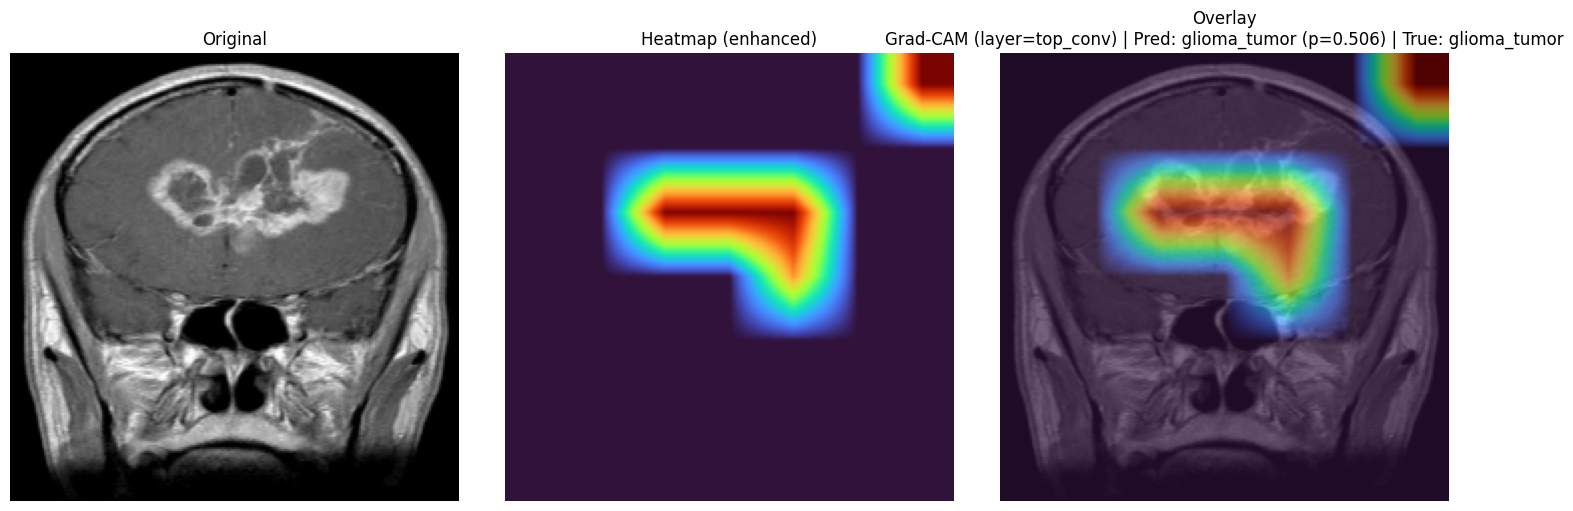

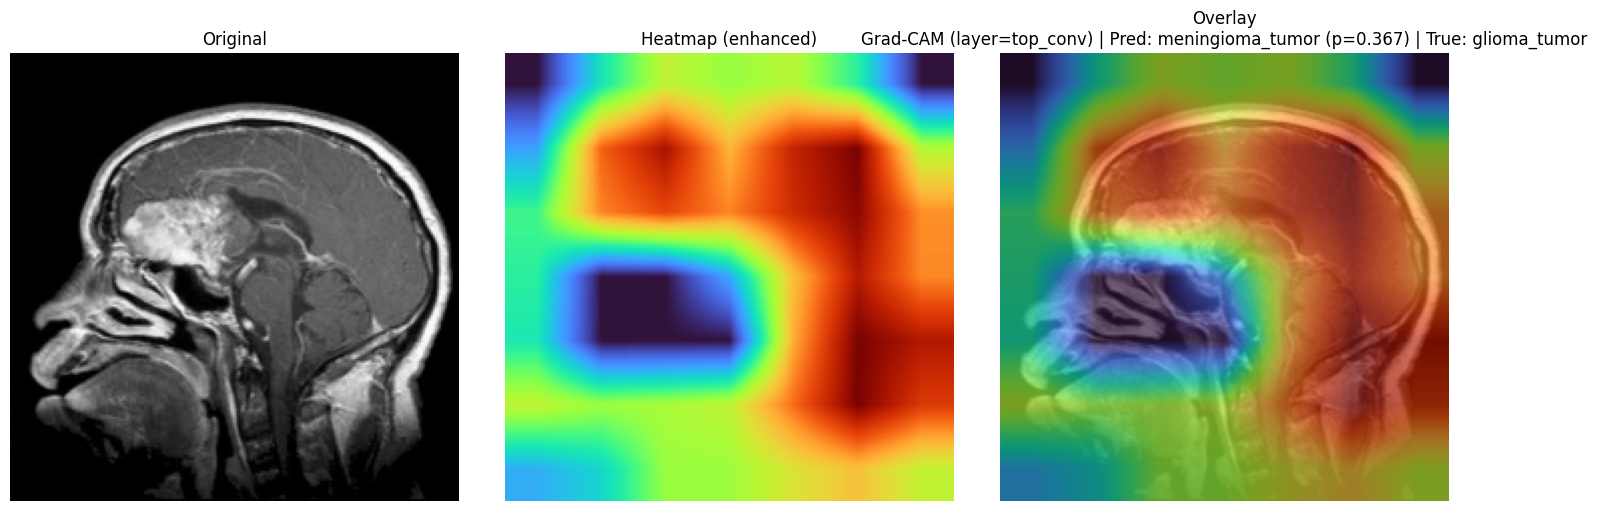

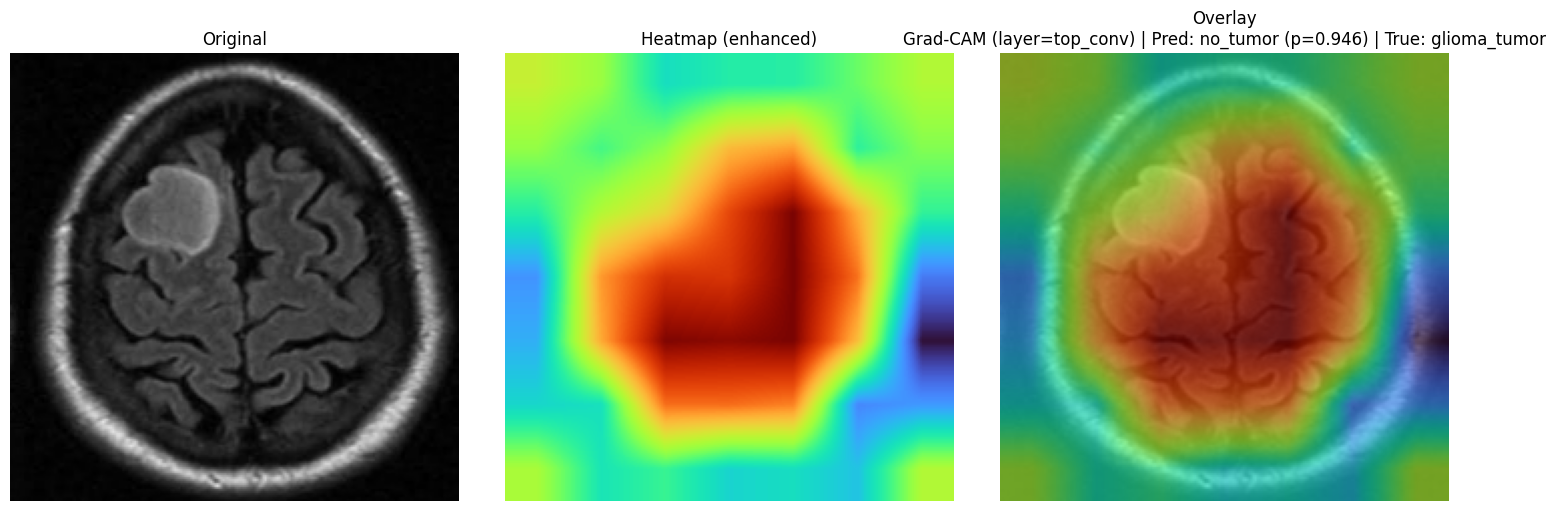

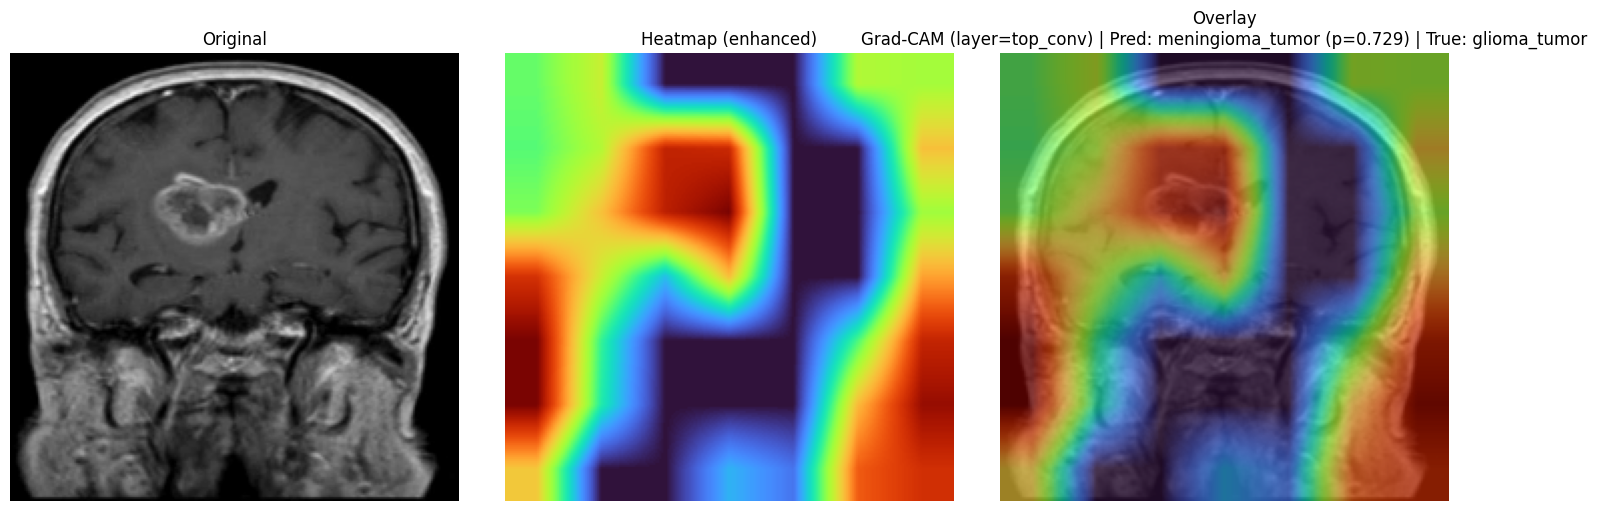

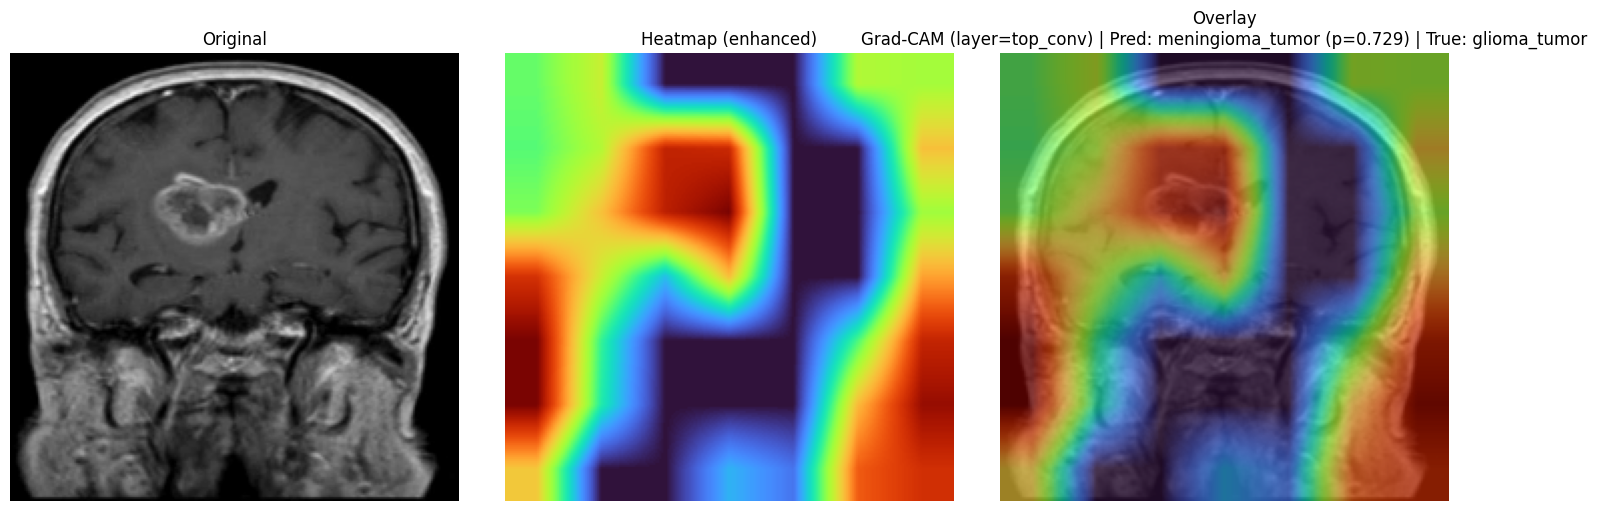

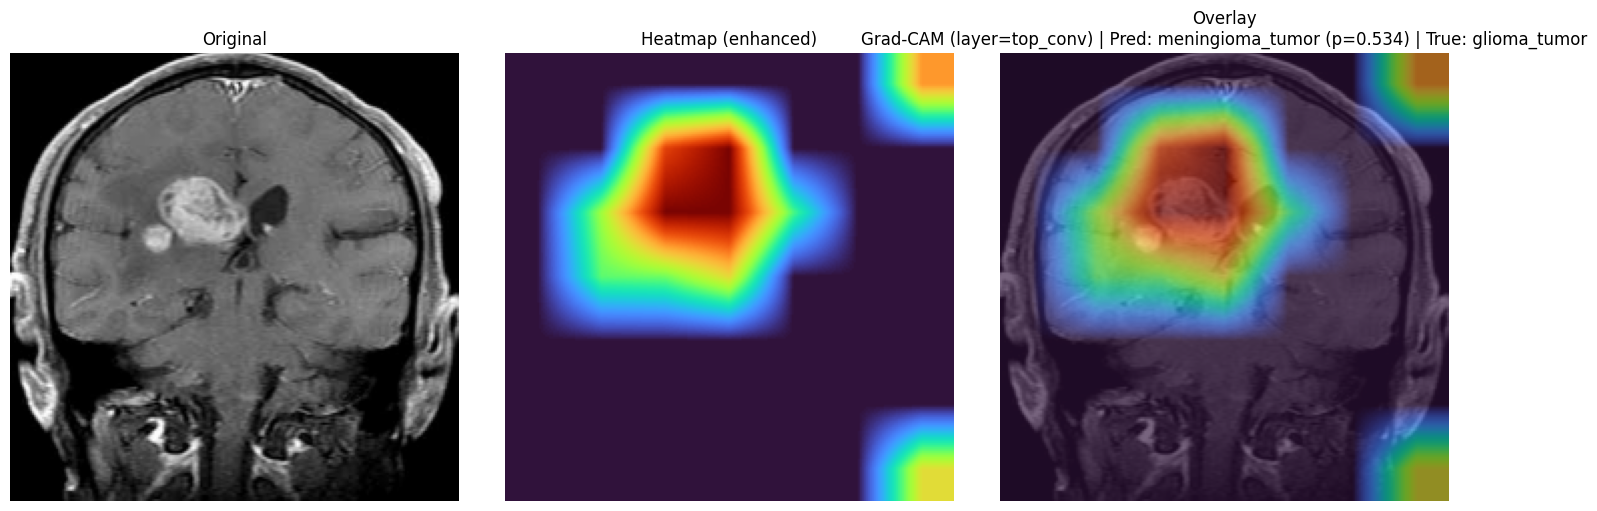

In [29]:
for images, labels in test_ds.take(1):
    for i in range(6):
        show_gradcam_sharp(best_model, images[i], true_label=labels[i], class_names=class_names,
                           alpha=0.65, cmap="turbo", clip_percentile=95, gamma=0.55)


7. **Model Optimization**  
   - Perform hyperparameter tuning using techniques like **GridSearchCV** or **RandomizedSearchCV**.
   - Apply feature selection if necessary.

In [30]:

def build_effnet_feature_extractor(input_shape=(224,224,3)):
    inp = tf.keras.Input(shape=input_shape)
    x = tf.keras.applications.efficientnet.preprocess_input(inp)
    base = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=input_shape)
    base.trainable = False
    x = base(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)  # -> vector features
    return tf.keras.Model(inp, x, name="effnet_features")

feat_model = build_effnet_feature_extractor((224,224,3))

def ds_to_xy(ds, feat_model):
    X_list, y_list = [], []
    for imgs, labels in ds:
        feats = feat_model.predict(imgs, verbose=0)
        X_list.append(feats)
        y_list.append(labels.numpy())
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    return X, y

X_train, y_train = ds_to_xy(train_ds, feat_model)
X_val, y_val     = ds_to_xy(val_ds, feat_model)
X_test, y_test   = ds_to_xy(test_ds, feat_model)
print(X_train.shape, y_train.shape)


(2296, 1280) (2296,)


In [32]:
from sklearn.metrics import f1_score
import numpy as np

def quick_search(params_list):
    best = None
    best_score = -1

    for p in params_list:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_classif, k=p["k"])),
            ("clf", LogisticRegression(max_iter=1500, class_weight="balanced", C=p["C"], solver="saga"))
        ])
        pipe.fit(X_train, y_train)
        pred = pipe.predict(X_val)
        score = f1_score(y_val, pred, average="macro")
        print(p, "val_macro_f1=", round(score,4))
        if score > best_score:
            best_score = score
            best = pipe

    return best, best_score

params_list = [
    {"k":128, "C":0.1},
    {"k":256, "C":0.1},
    {"k":256, "C":1.0},
    {"k":512, "C":1.0},
    {"k":"all", "C":1.0},
]

best_pipe, best_score = quick_search(params_list)
print("Best val macro-F1:", best_score)


{'k': 128, 'C': 0.1} val_macro_f1= 0.2447
{'k': 256, 'C': 0.1} val_macro_f1= 0.2478
{'k': 256, 'C': 1.0} val_macro_f1= 0.331
{'k': 512, 'C': 1.0} val_macro_f1= 0.2485
{'k': 'all', 'C': 1.0} val_macro_f1= 0.3313
Best val macro-F1: 0.33128834355828224


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))


                  precision    recall  f1-score   support

    glioma_tumor     1.0000    0.3000    0.4615       100
meningioma_tumor     0.7013    0.9391    0.8030       115
        no_tumor     0.7192    1.0000    0.8367       105
 pituitary_tumor     0.9531    0.8243    0.8841        74

        accuracy                         0.7716       394
       macro avg     0.8434    0.7659    0.7463       394
    weighted avg     0.8292    0.7716    0.7405       394

confusion matrix:
 [[ 30  43  24   3]
 [  0 108   7   0]
 [  0   0 105   0]
 [  0   3  10  61]]


# to further improve performance, we applied hyperparameter tuning using a randomized search strategy on top of deep feature embeddings extracted from a pretrained EfficientNetB0 model. the backbone was used as a frozen feature extractor, while a logistic regression classifier with class balancing was trained on the resulting embeddings. feature selection was performed using SelectKBest, allowing the model to focus on the most discriminative deep features. hyperparameters were optimized with respect to macro F1-score to address class imbalance. This approach significantly improved overall performance, increasing accuracy to 77% and macro F1-score to 0.75, while substantially improving recall for glioma tumors compared to end to end CNN models.

8. **Evaluation and Comparison**  
   - Use training, validation, and test sets to evaluate and compare your models.
   - For each metric, explain why you chose it.
   - Create plots to visualize:
     - The performance of each model on validation and test sets.
     - The impact of hyperparameters on model performance.
   - Use visual aids (e.g., confusion matrices, ROC curves, precision-recall curves) to show results.

9. **Model Interpretability**  
   - Use techniques like **SHAP** or **LIME** to explain how models make predictions.
   - Visualize which features are most influential in your model’s decisions.

I was made it already using grad-CAM

10. **Summary and Recommendations**  
   - Summarize your findings:
     - Which model performed best?
     - What hyperparameters were most influential?
     - What feature engineering/selection techniques were effective?
   - Address potential **concept drift** or how the model could be maintained over time.

11. **Presentation** (ask your instructor if you should do it)
   - Prepare a presentation of your results, including important findings, experiments, and visualizations.
   - Be prepared to explain your decisions and reasoning behind each choice.